Initial Data Preview:
         id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   

  Education Level     Occupation  Health Score  Location Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural       Basic   
1        Master's  Self-Employed     13.381379  Suburban     Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN         19.0           NaN                 1.0   
1              NaN         14.0         372.0                 8.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  



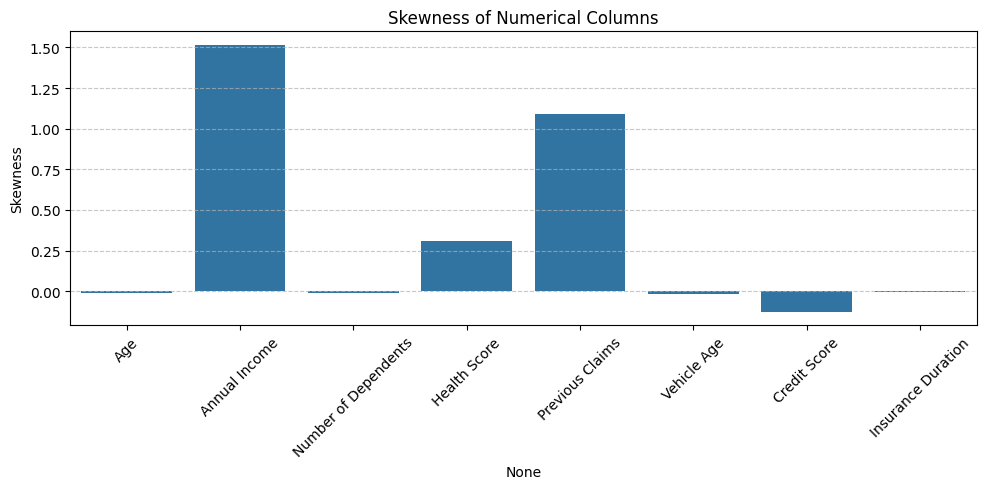

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class InsuranceDataCleaner:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None

    def load_data(self):
        self.df = pd.read_csv(self.file_path)
        pd.set_option('display.max_columns', None)
        print("Initial Data Preview:\n", self.df.head(2))

    def explore_data(self):
        print("\nShape:", self.df.shape)
        print("\nInfo:")
        self.df.info()
        print("\nDescribe:\n", self.df.describe())
        print("\nData Types:\n", self.df.dtypes)
        print("\nColumns:\n", self.df.columns)
        print("\nMissing Values:\n", self.df.isnull().sum())
        print("\nDuplicate Rows:", self.df.duplicated().sum())
        print("\nUnique Values:\n", self.df.nunique())

    def clean_data(self):
        # Drop ID column
        self.df.drop(columns=['id','Customer Feedback','Policy Start Date'], inplace=True)

        # Fill Age missing values with mean and convert to int
        self.df['Age'] = self.df['Age'].fillna(self.df['Age'].mean()).astype(int)

        # Fill numerical columns based on Age and Gender groups
        numerical_cols = ['Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Credit Score', 'Insurance Duration']
        for col in numerical_cols:
            self.df[col] = self.df.groupby(['Age', 'Gender'])[col].transform(lambda x: x.fillna(x.median()))

        # Fill categorical columns based on Age and Gender groups
        categorical_cols = ['Marital Status', 'Occupation']
        for col in categorical_cols:
            self.df[col] = self.df.groupby(['Age', 'Gender'])[col].transform(lambda x: x.fillna(x.mode()[0]))

        
        # Remove duplicates
        self.df = self.df.drop_duplicates()
        print("\nRemaining Missing Values:\n", self.df.isnull().sum())

    def save_cleaned_data(self, output_path):
        self.df.to_csv(output_path, index=False)
        print("\nCSV Stored Successfully at:", output_path)

    def check_skewness(self):
        print("\nSkewness of numerical columns:")
        num_cols = self.df.select_dtypes(include='number')
        skewness = num_cols.skew()
        print(skewness)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=skewness.index, y=skewness.values)
        plt.xticks(rotation=45)
        plt.ylabel("Skewness")
        plt.title("Skewness of Numerical Columns")
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


# === Usage Example ===
file_path = "/Users/somesh-19583/Desktop/Insurance_amount_prediction/Train/Test Data/test.csv"
output_path = "/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/test_cleaned_data.csv"

cleaner = InsuranceDataCleaner(file_path)
cleaner.load_data()
cleaner.explore_data()
cleaner.clean_data()
cleaner.save_cleaned_data(output_path)
cleaner.check_skewness()


In [2]:
df=pd.read_csv("/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/test_cleaned_data.csv")
df

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Smoking Status,Exercise Frequency,Property Type
0,28,Female,2310.0,Divorced,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,1.0,19.0,593.0,1.0,Yes,Weekly,House
1,31,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,1.0,14.0,372.0,8.0,Yes,Rarely,Apartment
2,47,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,1.0,16.0,819.0,9.0,Yes,Monthly,Condo
3,28,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,Yes,Daily,House
4,24,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,1.0,14.0,755.0,7.0,No,Weekly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799994,50,Female,38782.0,Married,1.0,Bachelor's,Self-Employed,14.498639,Rural,Premium,1.0,8.0,309.0,2.0,Yes,Daily,Condo
799995,41,Female,73462.0,Single,0.0,Master's,Unemployed,8.145748,Rural,Basic,2.0,0.0,591.0,2.0,No,Daily,Apartment
799996,26,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,1.0,10.0,593.5,6.0,No,Monthly,Apartment
799997,34,Female,45661.0,Single,3.0,Master's,Self-Employed,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,No,Weekly,Condo


Initial data loaded.

Handling outliers...


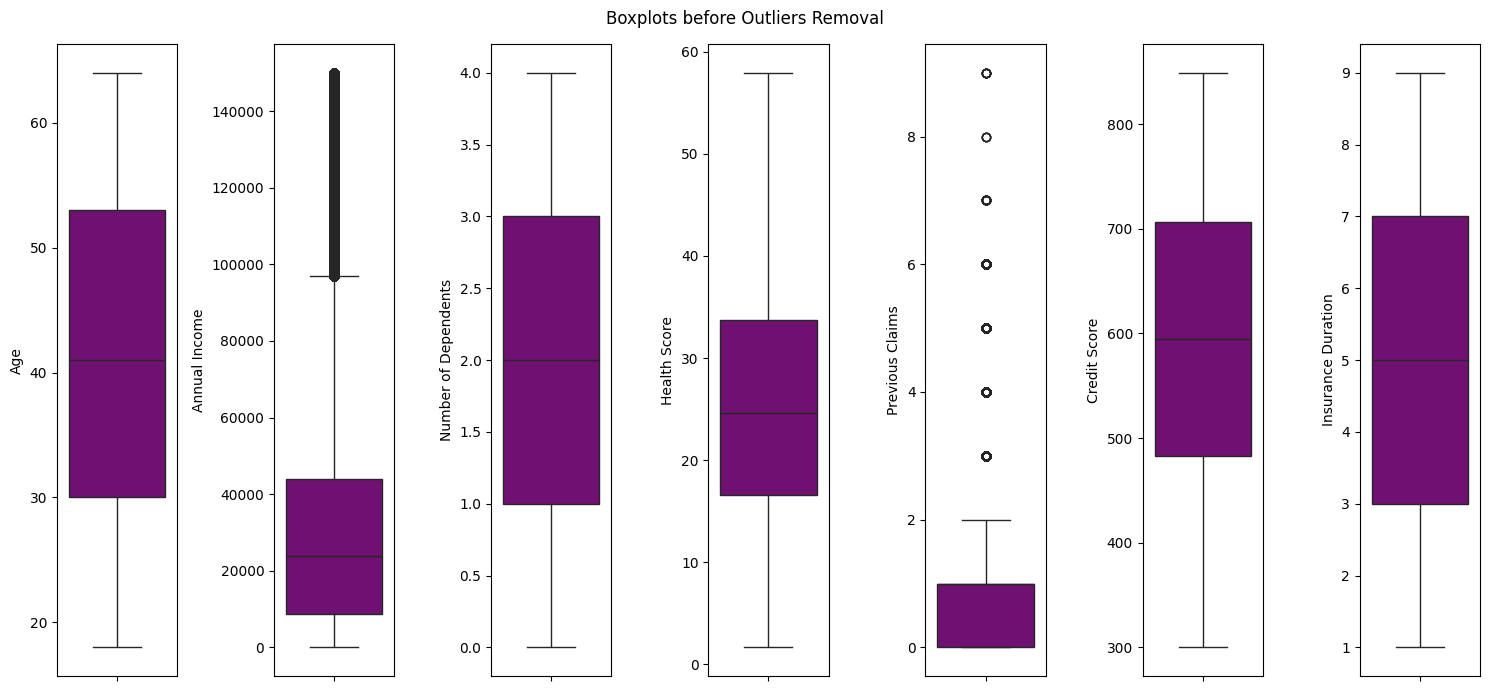

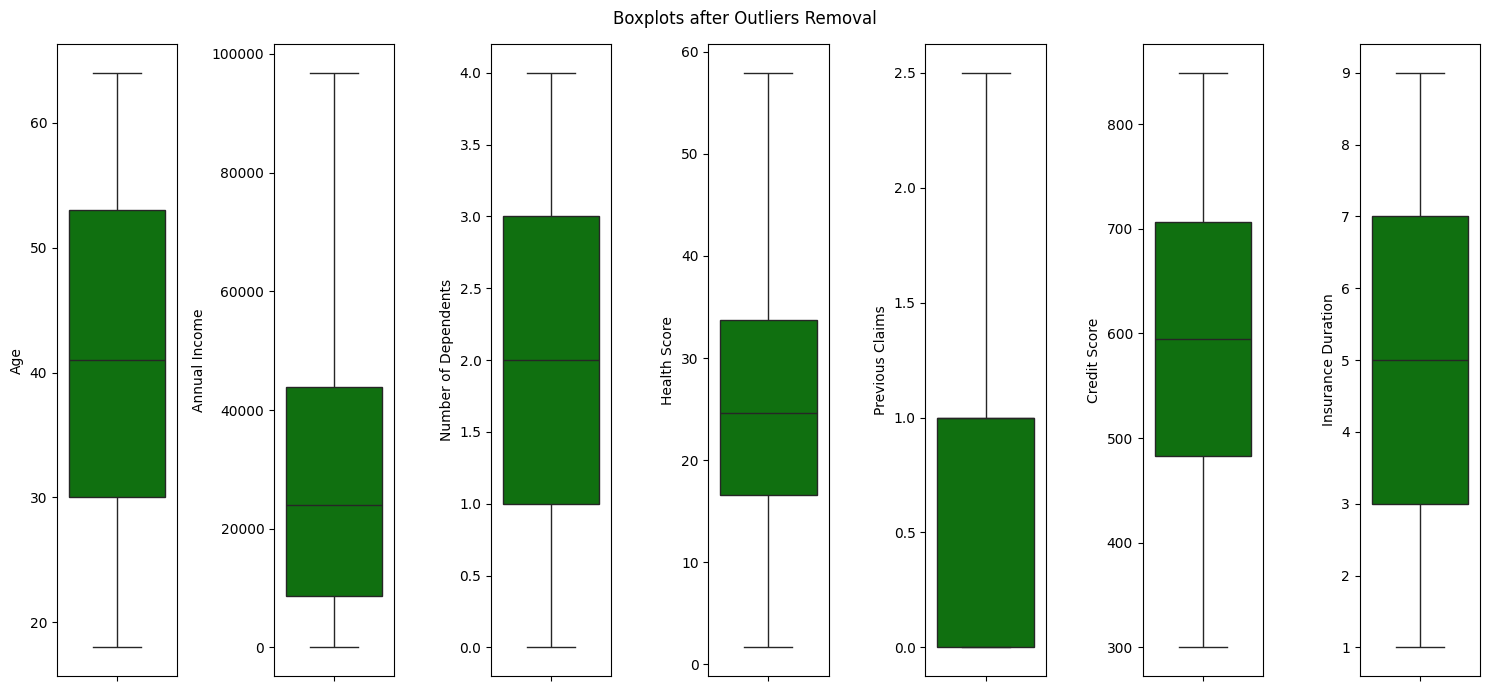


Handling skewness...
Skewness before transformation:
 Age                    -0.009659
Annual Income           1.060489
Number of Dependents   -0.010932
Health Score            0.308384
Previous Claims         0.319372
Vehicle Age            -0.019898
Credit Score           -0.127416
Insurance Duration     -0.006913
dtype: float64


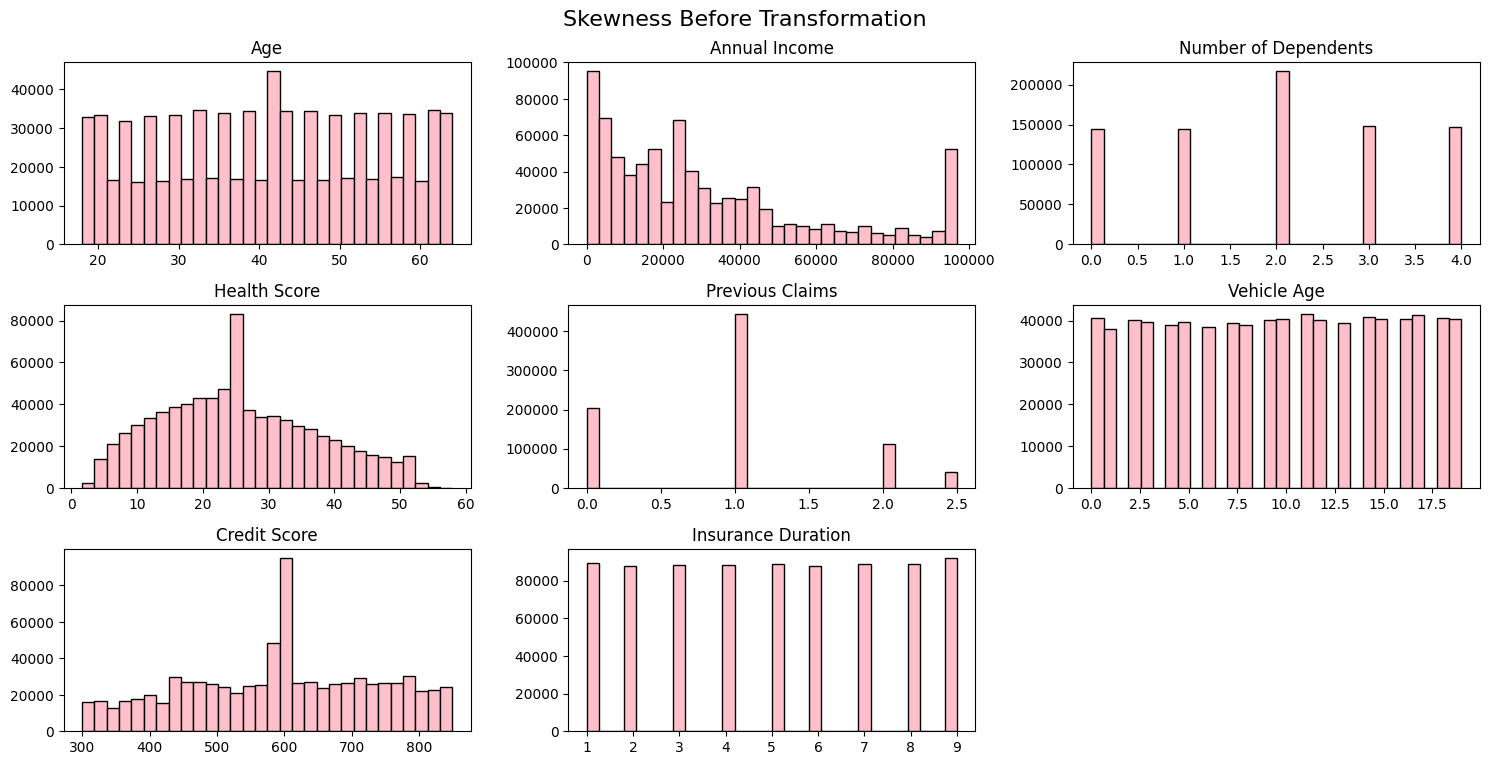

Skewness after transformation:
 Annual Income   -1.114878
dtype: float64


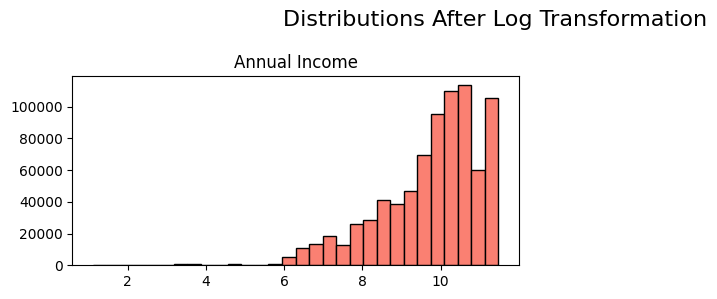


Encoding categorical features...

Preprocessed data saved to: /Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/test_preprocessed_data.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

class InsurancePreprocessor:
    def __init__(self, input_path):
        self.input_path = input_path
        self.df = None
        self.ohe = OneHotEncoder(drop='first', handle_unknown='ignore')
    
    def load_data(self):
        self.df = pd.read_csv(self.input_path)
        pd.set_option('display.max_columns', None)
        print("Initial data loaded.")
        if 'Unnamed: 0' in self.df.columns:
            self.df.drop(columns=['Unnamed: 0'], inplace=True)

    def handle_outliers(self):
        print("\nHandling outliers...")
        numerical_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score',
                          'Previous Claims', 'Credit Score', 
                          'Insurance Duration']
        
        # Boxplot before
        plt.figure(figsize=(15, 7))
        plt.suptitle("Boxplots before Outliers Removal")
        for i in range(len(numerical_cols)):
            plt.subplot(1, len(numerical_cols), i + 1)
            sns.boxplot(y=self.df[numerical_cols[i]], color='purple')
            plt.tight_layout()
        plt.show()

        for col in numerical_cols:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            self.df[col] = np.where(self.df[col] < lower, lower, self.df[col])
            self.df[col] = np.where(self.df[col] > upper, upper, self.df[col])

        # Boxplot after
        plt.figure(figsize=(15, 7))
        plt.suptitle("Boxplots after Outliers Removal")
        for i in range(len(numerical_cols)):
            plt.subplot(1, len(numerical_cols), i + 1)
            sns.boxplot(y=self.df[numerical_cols[i]], color='green')
            plt.tight_layout()
        plt.show()

    def handle_skewness(self):
        print("\nHandling skewness...")
        num_cols = self.df.select_dtypes(include='number')
        skewness_before = num_cols.skew()
        print("Skewness before transformation:\n", skewness_before)

        plt.figure(figsize=(15, 10))
        plt.suptitle("Skewness Before Transformation", fontsize=16)
        for idx, col in enumerate(num_cols.columns):
            plt.subplot(4, 3, idx + 1)
            plt.hist(self.df[col], bins=30, color='pink', edgecolor='black')
            plt.title(col)
            plt.tight_layout()
        plt.show()

        # Apply log1p on positively skewed columns
        skewed_cols = ['Annual Income']
        self.df[skewed_cols] = self.df[skewed_cols].apply(lambda x: np.log1p(x))

        # After transformation
        skewness_after = self.df[skewed_cols].skew()
        print("Skewness after transformation:\n", skewness_after)

        plt.figure(figsize=(10, 3))
        plt.suptitle("Distributions After Log Transformation", fontsize=16)
        for idx, col in enumerate(skewed_cols):
            plt.subplot(1, 2, idx + 1)
            plt.hist(self.df[col], bins=30, color='salmon', edgecolor='black')
            plt.title(col)
            plt.tight_layout()
        plt.show()

    def encode_features(self):
        print("\nEncoding categorical features...")

        # One-hot encode nominal categorical variables
        nominal_cols = ['Gender','Policy Type','Smoking Status','Property Type',
                        'Marital Status','Occupation','Location']
        encoded_array = self.ohe.fit_transform(self.df[nominal_cols]).toarray()
        encoded_df = pd.DataFrame(encoded_array, columns=self.ohe.get_feature_names_out(nominal_cols)).astype(int)
        self.df = pd.concat([self.df.drop(columns=nominal_cols), encoded_df], axis=1)

        # Ordinal encoding
        education_map = {'High School': 0, "Bachelor's": 1, "Master's": 2, 'PhD': 3}
        exercise_map = {'Rarely': 0, 'Monthly': 1, 'Weekly': 2, 'Daily': 3}

        self.df['Education Level'] = self.df['Education Level'].map(education_map)
        self.df['Exercise Frequency'] = self.df['Exercise Frequency'].map(exercise_map)

    def save_data(self, output_path):
        self.df.to_csv(output_path, index=False)
        print("\nPreprocessed data saved to:", output_path)

    def get_dataframe(self):
        return self.df


# === Usage ===
input_path = "/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/test_cleaned_data.csv"
output_path = "/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/test_preprocessed_data.csv"

processor = InsurancePreprocessor(input_path)
processor.load_data()
processor.handle_outliers()
processor.handle_skewness()
processor.encode_features()
processor.save_data(output_path)


In [4]:
df=pd.read_csv("/Users/somesh-19583/Desktop/Insurance_amount_prediction/csv/test_preprocessed_data.csv")
df1 = df[['Annual Income', 'Credit Score', 'Health Score', 'Previous Claims',
        'Age', 'Vehicle Age','Insurance Duration',
        'Number of Dependents',  'Education Level','Exercise Frequency']]
df1

,Annual Income,Credit Score,Health Score,Previous Claims,Age,Vehicle Age,Insurance Duration,Number of Dependents,Education Level,Exercise Frequency
0,7.745436,593.0,7.657981,1.0,28.0,19.0,1.0,4.0,1,2
1,11.480699,372.0,13.381379,1.0,31.0,14.0,8.0,2.0,2,0
2,9.746424,819.0,24.354527,1.0,47.0,16.0,9.0,0.0,3,1
3,10.323020,770.0,5.136225,1.0,28.0,3.0,5.0,3.0,3,3
4,9.293210,755.0,11.844155,1.0,24.0,14.0,7.0,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...
799994,10.565737,309.0,14.498639,1.0,50.0,8.0,2.0,1.0,1,3
799995,11.204537,591.0,8.145748,2.0,41.0,0.0,2.0,0.0,2,3
799996,10.468205,593.5,6.636583,1.0,26.0,10.0,6.0,0.0,2,1
799997,10.729022,467.0,15.937248,2.0,34.0,17.0,7.0,3.0,2,2


In [6]:
import pickle
import pandas as pd
import numpy as np


# 1. Load the pickled model
with open('/Users/somesh-19583/Desktop/Insurance_amount_prediction/Pickled Data/xgb_model.pkl','rb') as f:
    model = pickle.load(f)

# 2. Load the pickled scaler
with open('/Users/somesh-19583/Desktop/Insurance_amount_prediction/Pickled Data/scaler.pkl','rb') as f:
    scaler = pickle.load(f)

# 3. Load the test data (replace with actual file or DataFrame as needed)
test_data = df1  # You can replace this with pd.read_csv("your_test_file.csv")


# 4. Apply the scaler to test data
test_scaled = scaler.transform(test_data)

# 5. Predict using the model
predictions = model.predict(test_scaled)

# 6. Inverse-transform predictions if model was trained on log1p(target)
predictions_actual = np.expm1(predictions)

# 7. Print predictions in original scale
print(predictions_actual)


[716.2601  803.83527 822.6562  ... 778.45807 801.0715  784.45605]
